<a href="https://colab.research.google.com/github/wodnjse/machine-learning/blob/main/Deep-Neural-Network/machine_learning_7_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **신경망 모델 훈련 - 드롭아웃, 콜백, 조기종료**
###시작하기 전에

1. 복습: 인공 신경망 + 심층 신경망 + 옵티마이저
2. 머신러닝: 매개변수 조정, 훈련 반복 → 모델 구조가 <font color="#ffae4a">어느 정도 고정</font>
3. 딥러닝 <font color="#ffae4a">모델의 구조</font>를 직접 만듬 → 층 추가, 뉴런 개수, 활성화함수 결정
4. 케라스 API 사요앻 모델 훈련 시 필요한 <font color="#ffae4a">다양한 도구</font>를 알아보자!

---

## **데이터 준비**
패션 MNIST 데이터셋 로딩

In [8]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()

In [9]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state= 42
)

> 1. 이미지 픽셀값: 0~255 범위를 <font color="#ff0000">0 ~ 1</font> 사이로 변환
2. 28x28 크기의 2차원 배열을 <font color="#ff0000">784 크기</font>의 1차원 배열로 변환
3. 훈련 세트를 <font color="#ff0000">훈련 세트와 검증 세트</font>로 분류

## **모델 생성 함수**
모델 생성 함수 정의

In [10]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

> <font color="#ff0000">a_layer 매개변수</font>: 은닉층 뒤에 또 하나의 층 추가

## **모델 생성 함수**
model_fn() 함수 호출(층 추가 x)

In [11]:
model = model_fn()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


> 앞서 만든 모델 결과와 <font color="#ff0000">동일!</font>

## **모델 생성 함수**

모델 훈련

In [14]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target))

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3117 - accuracy: 0.8901
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2994 - accuracy: 0.8943
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2915 - accuracy: 0.8963
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2831 - accuracy: 0.9017
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2770 - accuracy: 0.9056
Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2722 - accuracy: 0.9054 - val_loss: 0.3905 - val_accuracy: 0.8842
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2653 - accuracy: 0.9077 - val_loss: 0.4315 - val_accuracy: 0.8748
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2622 - accuracy: 0.9111 - val_loss: 0.4149 - val_accuracy: 0.8817
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/

> fit() 메서드는 <font color="#ff0000">History 클래스 객체</font> 반환
- 훈련 과정에서 계산한 지표(<font color="#ff0000">손실, 정확도 값</font>) 저장되어 있음
- 저장해서 출력해보자!

In [13]:
print(history.history.keys())

NameError: ignored

## **손실 곡선**
모델 훈련 결과를 <font color="#ffae4a">history 변수</font>에 저장

metrics 매개변수: <font color="#ffae4a">accuracy</font> 지정해야 정확도 저장

In [15]:
model.compile(loss='sparse_categorical_crossentropy', metrics= 'accuracy')
history = model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1972 - accuracy: 0.9341
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1933 - accuracy: 0.9361
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1923 - accuracy: 0.9377
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1892 - accuracy: 0.9371
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1838 - accuracy: 0.9389


In [16]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


> history 변수에 저장된 손실과 정확도는 <font color="#ff0000">에포크마다</font> 계산한 값이 순서대로 나열된 리스트
- 👉 <font color="#ff0000">시각화</font>해보자!

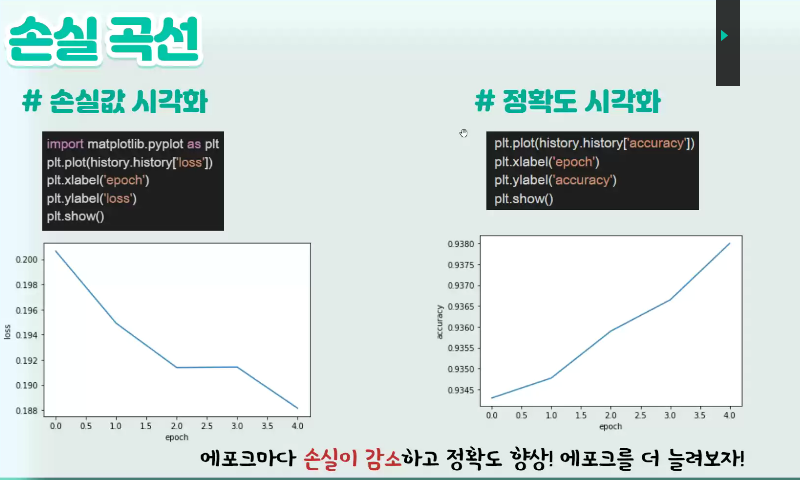

## **손실 곡선**
**손실값 시각화**

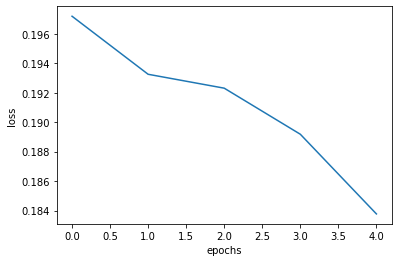

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

**정확도 시각화**

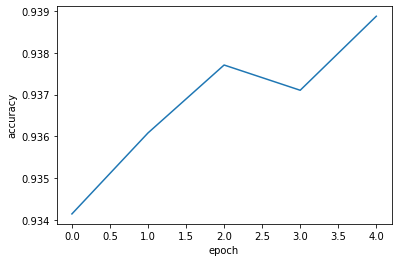

In [18]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

> ***에포크마다 손실이 감소하고 정확도 향상! 에포크를 더 넣어보자***

## **손실 곡선**
에포크 횟수 20 지정

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5313 - accuracy: 0.8136
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3943 - accuracy: 0.8581
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3588 - accuracy: 0.8722
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3373 - accuracy: 0.8801
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3239 - accuracy: 0.8844
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3104 - accuracy: 0.8896
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3015 - accuracy: 0.8943
Epoch 8/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2923 - accuracy: 0.8969
Epoch 9/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2870 - accuracy: 0.8992
Epoch 10/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.279

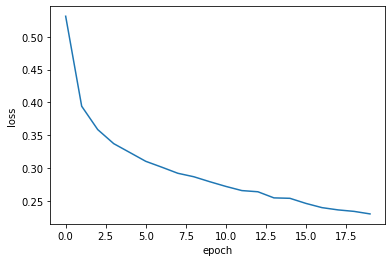

In [19]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs= 20)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

> 손실은 잘 감소!

하지만 과도한 훈련으로 인해 <font color='#ff0000'>과대적합</font>이 발생하지 않을까?

## **검증 손실**
에포크마다 <font color="#ffae4a">검증 손실</font> 계산

<font color="#ffae4a">validation_data</font> 매개변수: 검증용 입력과 타깃값 튜플로 전달

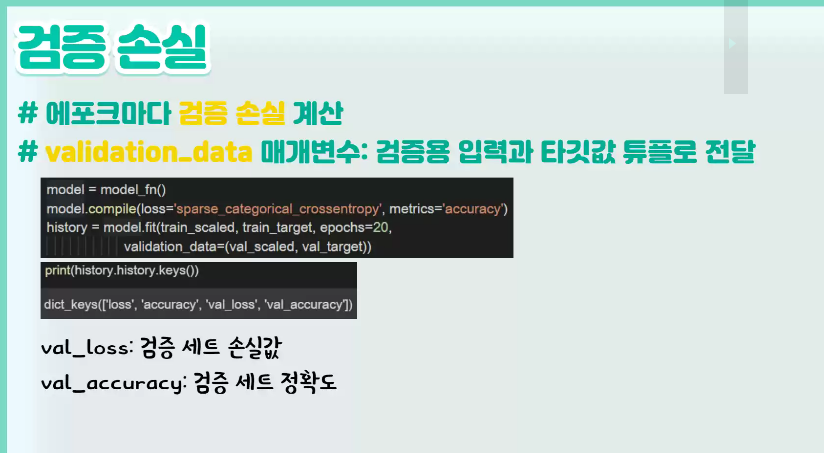

In [20]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs= 20,
                    validation_data= (val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5339 - accuracy: 0.8117 - val_loss: 0.4722 - val_accuracy: 0.8313
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3911 - accuracy: 0.8605 - val_loss: 0.4133 - val_accuracy: 0.8518
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3561 - accuracy: 0.8719 - val_loss: 0.4034 - val_accuracy: 0.8638
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3347 - accuracy: 0.8801 - val_loss: 0.3542 - val_accuracy: 0.8763
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3186 - accuracy: 0.8877 - val_loss: 0.3601 - val_accuracy: 0.8783
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3098 - accuracy: 0.8907 - val_loss: 0.3640 - val_accuracy: 0.8767
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2999 - accuracy: 0.8946 - val_loss: 0.3619 - val_accuracy:

In [21]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


> - val_loss: 검증 세트 손실값
- val_accuracy: 검증 세트 정확도

## **검증 손실**
과대/과서적합 문제 조사를 위해 한 그래프로 시각화

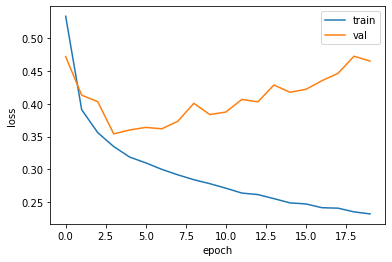

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show( )

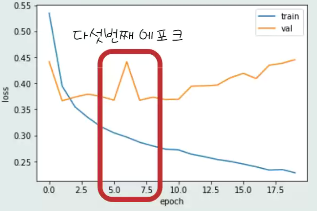

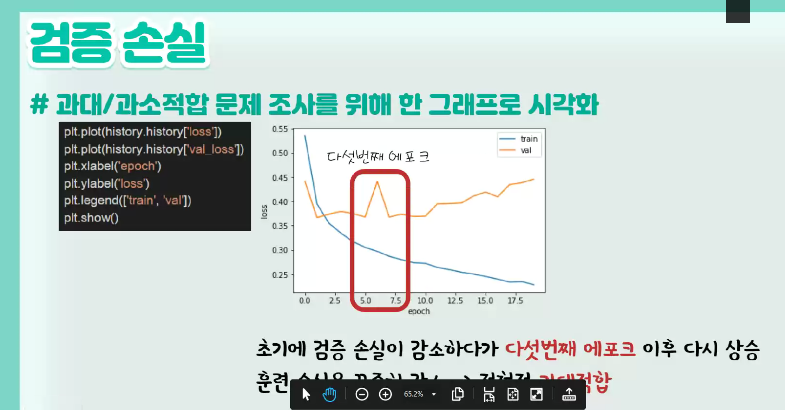

> 초기에 검증 손실이 감소하다가 다섯번째 에포크 이후 다시 상승

훈련 수신용 꾸준함 가 과대적합

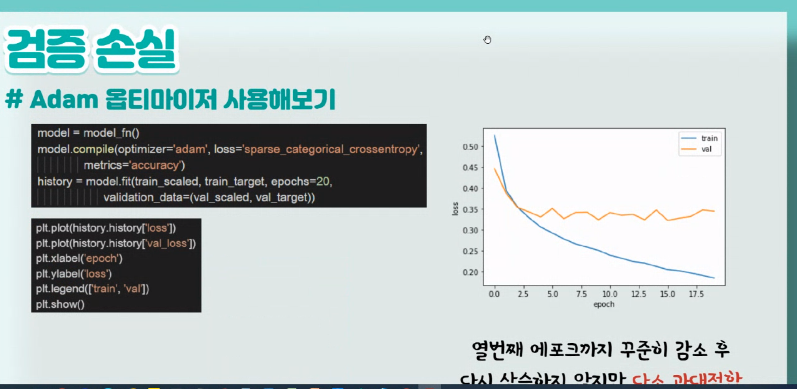

Adam 옵티마이저 사용해보기

In [23]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs= 20,
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5184 - accuracy: 0.8186 - val_loss: 0.4724 - val_accuracy: 0.8342
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3925 - accuracy: 0.8600 - val_loss: 0.4034 - val_accuracy: 0.8593
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3519 - accuracy: 0.8730 - val_loss: 0.3853 - val_accuracy: 0.8597
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3246 - accuracy: 0.8827 - val_loss: 0.3390 - val_accuracy: 0.8792
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3085 - accuracy: 0.8866 - val_loss: 0.3368 - val_accuracy: 0.8816
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2906 - accuracy: 0.8935 - val_loss: 0.3444 - val_accuracy: 0.8772
Epoch 7/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2784 - accuracy: 0.8979 - val_loss: 0.3382 - val_accuracy:

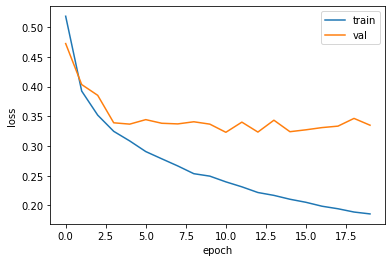

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

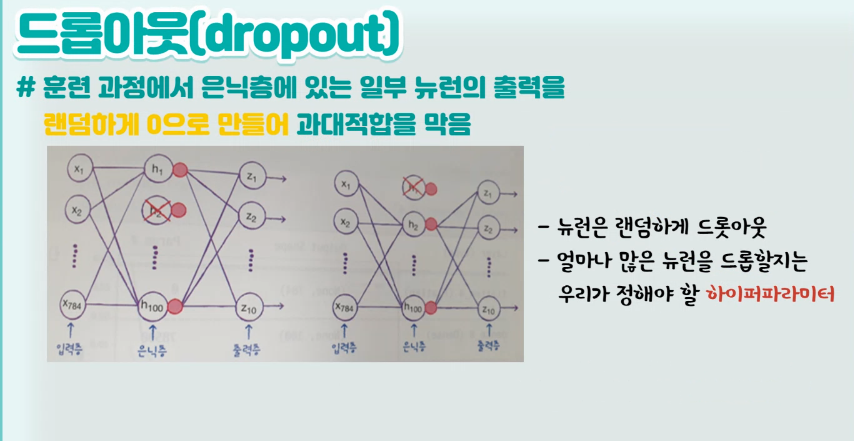

## **드롭아웃(dropout)**
훈련 과정에서 은닉층에 있는 일부 뉴런의 출력을 <font color="#ffae4a">랜덤하게 0으로 만들어</font> 과대적합을 막음

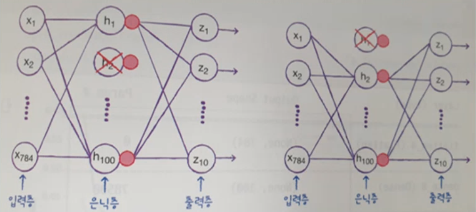

>
- 뉴런은 랜덤하게 드롭아웃

- 얼마나 많은 뉴런을 드롭할지는 우리가 정해야 할 <font color="#ff0000">하이퍼파라미터</font>

랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 <font color="#ffae4a">줄일 수 있음</font>

모든 입력에 대해 주의를 기울이며, 더<font color="#ffae4a"> 안정적</font>인 예측 모델 생성 가능

마치 여러 개의 신경망을 <font color="#ffae4a">앙상블</font> 하는 것으로 볼 수 있음

keras.layers 패키지 아래 Dropout 클래스로 제공
  - : 어떤 층의 뒤에 드롭아웃을 두어 이 층의 출력을 랜덤하게 0으로 만듦

매개변수로 <font color="#ffae4a">몇 % 드롭아웃</font>할지 결정

앞서 정의한 model_fn() 함수에 <font color="#ffae4a">드롭아웃 객체 전달</font>하여 층 추가

여기에서는 30% 정도 드롭아웃


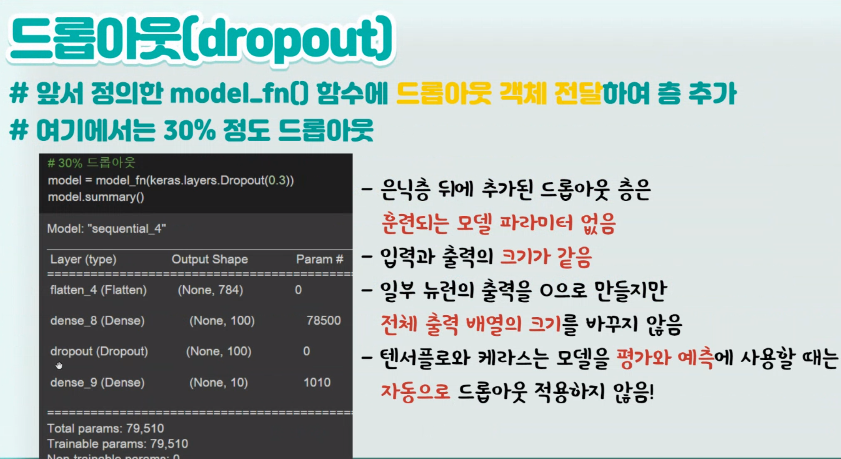

In [25]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


> - 은닉층 뒤에 추가된 드롭아웃 층은 <font color="#ff0000">훈련되는 모델 파라미터 없음</font>
- 입력과 출력의 <font color="#ff0000">크기가 같음</font>
- 일부 뉴런의 출력을 0으로 만들지만 <font color="#ff0000">전체 출력 배열의 크기</font>를 바꾸지 않음
- 텐서플로와 케라스는 모델을 <font color="#ff0000">평가와 예측</font>에 사용할 때는 <font color="#ff0000">자동으로</font> 드롭아웃 적용하지 않음!

평가와 예측을 수행할 때는 <font color="#ffae4a">자동으로</font> 드롭아웃 적용하지 않음

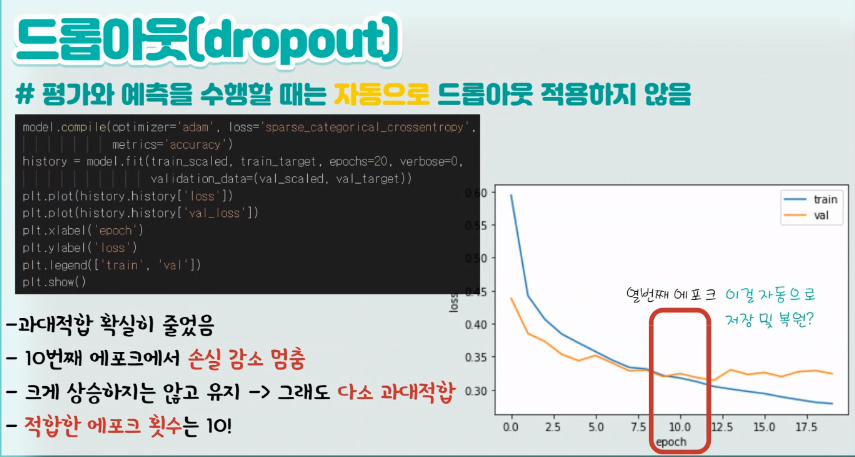

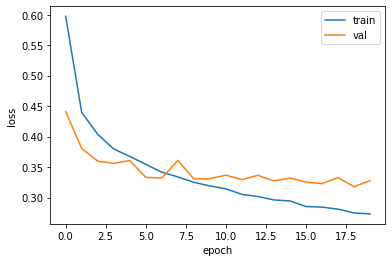

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data= (val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

> - 과대적합 확실히 줄었음
- 10번째 에포크에서 <font color="#ff0000">손실 감소 멈춤</font>
- 크게 상승하지는 않고 유기 → 그래도 <font color="#ff0000">다소 과대적합</font>
- <font color="#ff0000">적합한 에포크 횟수</font>는 10!